### 가우시안 혼합 모형

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

#확률 기반 군집화(데이터 포인트가 각 클러스터에 속할 확률 계산)
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
lables = gmm.predict(iris.data)
print(lables)

df['gmm_cluster'] = lables
df['target'] = iris.target

result = df.groupby(['target'])['gmm_cluster'].value_counts()

print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64


In [2]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data)
lables = kmeans.predict(iris.data)

df['kmeans_cluster'] = lables

result = df.groupby(['target'])['kmeans_cluster'].value_counts()

print(result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: count, dtype: int64


In [3]:
#학습 시간이 오래 걸림

import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.mixture import GaussianMixture

(x_train,y_train),(x_test,y_test)=mnist.load_data()

X=x_train[np.isin(y_train,[0])] # class 0만 선택
X=X.reshape((X.shape[0],28*28))

gm=GaussianMixture(n_components=8).fit(X)  # 8개의 클러스터

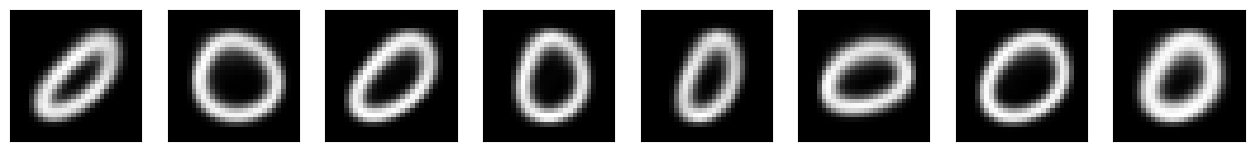

In [4]:
# 학습된 8개의 가우시안 평균 그래프

import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))        

for i in range(8):
    plt.subplot(1,10,i+1)
    plt.imshow(gm.means_[i].reshape((28,28)),cmap='gray')
    plt.xticks([])
    plt.yticks([])    

plt.show()

[[-4.37040469e-04  2.40392227e-05 -1.38729266e-03 ...  1.54985372e-04
   2.55223048e-04  3.14159949e-04]
 [ 3.51747660e-04  1.36533130e-03 -1.33948612e-03 ...  8.32174706e-04
  -9.03977382e-04  2.69087119e-04]
 [-8.26984372e-04  5.41785509e-04 -8.02619052e-04 ...  1.16662579e-03
   1.70351924e-04 -1.79170969e-03]
 ...
 [-2.13777772e-03 -1.78768858e-03 -1.74157094e-03 ... -1.68764722e-04
  -1.27746887e-04 -6.94999429e-06]
 [-1.16882102e-03  5.40609285e-04  4.12525849e-04 ... -5.23288936e-04
   1.91315977e-03 -2.73496085e-04]
 [ 5.65159824e-05  4.34974011e-05 -9.03035206e-04 ...  9.40413966e-05
  -7.08003666e-05  5.72275681e-05]]


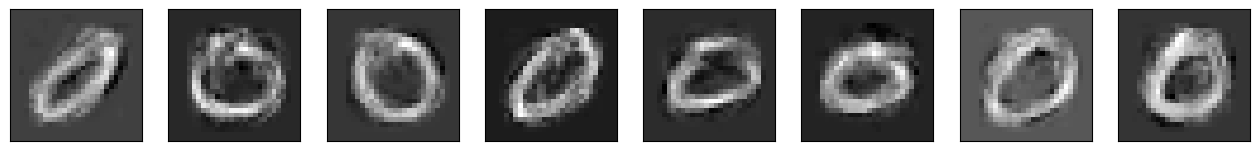

In [5]:
#학습된 확률 기반으로 새로운 샘플 생성

gan=gm.sample(n_samples=8)
print(gan[0])

plt.figure(figsize=(16,4))        

for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(gan[0][i].reshape((28,28)),cmap='gray')
    plt.xticks([])
    plt.yticks([])
  
plt.show()